# Imports

In [ ]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import scipy

import tensorflow as tf
from tensorflow import keras

import os
import copy
import random

In [16]:
base_folder = '/home/joffrey/Documents/projects/pneumonia/dataset/chest_xray/'

TRAIN_FOLDER = base_folder + 'train'
TEST_FOLDER = base_folder + 'test'

# Exploratory data analysis

### Category distribution

In [17]:
# Amount of normal observation
normal_images = os.listdir(TRAIN_FOLDER + '/NORMAL')
len(normal_images)

1341

In [18]:
# Amount of pneumonia distribution
pneumonia_images = os.listdir(TRAIN_FOLDER + '/PNEUMONIA')
len(pneumonia_images)

3875

**Observation**: They are more than twice pneumonia observation than normal obsrvation.

- Regularize weights during learning ?

### Check image size

In [19]:
index = 854
img = cv2.imread(TRAIN_FOLDER + '/NORMAL/' + normal_images[index])
img.shape

(1473, 1778, 3)

**Observation**: Larges images with differents sizes.

- Need to rescale ?
- Need to crop the area of interest ?
- Crop randomly NxN ROI

### Image vizualisation

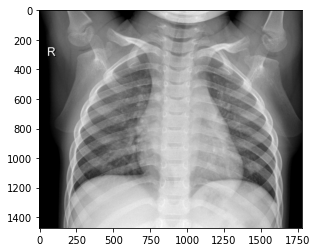

In [20]:
plt.imshow(img)
plt.show()

In [21]:
from tensorflow.keras.preprocessing import image

train_datagen = image.ImageDataGenerator(
    rescale=1./255
    
).flow_from_directory(
    TRAIN_FOLDER,
    target_size=(1000, 1300),
    color_mode="rgb",
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=42,
)

Found 5216 images belonging to 2 classes.


In [22]:
# Get a sample from the dataset
train_iter = iter(train_datagen)
x_train_sample, y_train_sample = train_iter.next()

In [1]:
plt.imshow(x_train_sample[0])
plt.show()

NameError: name 'plt' is not defined